# Build Pipeline and Predict Sentiment

In [1]:
import pandas as pd
import numpy as np

### Import feedback datafile

In [2]:
#Read the feedback file created via EDA_Prepare_Data notebook.
#The sentiment score has already been calculated and stored in the file. 

df = pd.read_csv('./data/feedback.csv')  
df.dtypes

id                        int64
person_name              object
updated                    bool
reviewed                   bool
performance              object
potential                object
category                  int64
peformance_potential     object
feedback_sent            object
polarity                 object
confidence              float64
word_count                int64
dtype: object

In [3]:
df['category']= df['category'].astype(str)
df.dtypes

id                        int64
person_name              object
updated                    bool
reviewed                   bool
performance              object
potential                object
category                 object
peformance_potential     object
feedback_sent            object
polarity                 object
confidence              float64
word_count                int64
dtype: object

In [4]:
df

,id,person_name,updated,reviewed,performance,potential,category,peformance_potential,feedback_sent,polarity,confidence,word_count
0,20051,Lacey Howard,True,True,Low,Low,1,1: Low : Low,Lacey's performance has been sub standard in t...,NEGATIVE,0.758257,11
1,20051,Lacey Howard,True,True,Low,Low,1,1: Low : Low,She tries to take up too many tasks at the sam...,NEGATIVE,0.997663,24
2,20051,Lacey Howard,True,True,Low,Low,1,1: Low : Low,"Although she has delivered some results, they ...",NEGATIVE,0.999925,23
3,20051,Lacey Howard,True,True,Low,Low,1,1: Low : Low,Unless she improves a lot by taking advantage ...,NEGATIVE,0.960807,28
4,20057,Amy Jones,True,True,Low,Low,1,1: Low : Low,Amy struggles at her work a lot.,NEGATIVE,0.995157,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4552,20023,Allan Logan,True,True,High,High,9,9: High : High,"Never before have I seen so much talent, I onl...",POSITIVE,0.998588,15
4553,20024,Allan Logan,True,True,High,High,9,9: High : High,Allan Logan touches anything and it turns to g...,POSITIVE,0.822073,9
4554,20024,Allan Logan,True,True,High,High,9,9: High : High,Nothing but the most capable hand in the team.,POSITIVE,0.999360,9
4555,20024,Allan Logan,True,True,High,High,9,9: High : High,He has shown he can achieve what many would dr...,POSITIVE,0.999163,11


## Examine data - determine necessary cleaning

In [5]:
#No Null values found
df.isna().sum()  

id                      0
person_name             0
updated                 0
reviewed                0
performance             0
potential               0
category                0
peformance_potential    0
feedback_sent           0
polarity                0
confidence              0
word_count              0
dtype: int64

In [6]:
#All unique values are valid.
columns = ('performance','potential','category','polarity','updated','reviewed')
for col in columns:
   print(df[col].unique())


['Low' 'Moderate' 'High']
['Low' 'Moderate' 'High']
['1' '2' '3' '4' '5' '6' '7' '8' '9']
['NEGATIVE' 'POSITIVE']
[ True False]
[ True False]


#### Look for rows with invalid text

In [7]:
#Verify at least one word in each comment
#What do these very short sentences look like? 
df.word_count.min()

1

In [8]:
df.loc[df['word_count'] == 1]

,id,person_name,updated,reviewed,performance,potential,category,peformance_potential,feedback_sent,polarity,confidence,word_count
1136,58,Caiden Pace,False,False,Low,Low,1,1: Low : Low,.,POSITIVE,0.759743,1
1890,177,Bruno Johns,False,False,High,Low,3,3: High : Low,:),POSITIVE,0.977196,1
2651,10142,Lexi Rogers,False,False,Low,Moderate,4,4: Low : Moderate,Teamworkâ€™s.,POSITIVE,0.998984,1
3239,433,Pedro David,False,False,High,Moderate,6,6: High : Moderate,Thanks.,POSITIVE,0.986550,1


In [9]:
#Find rows with no characters. 
no_char = df[~df['feedback_sent'].str.contains('[A-Za-z]')]
no_char['feedback_sent']


1136     .
1890    :)
Name: feedback_sent, dtype: object

In [10]:
#Remove the invalid rows
#NOTE!!!!!!!!  More cleanup of special characters must be done for final model!!!!

df = df[df['feedback_sent'].str.contains('[A-Za-z]')]
df.loc[df['word_count'] <= 1]

,id,person_name,updated,reviewed,performance,potential,category,peformance_potential,feedback_sent,polarity,confidence,word_count
2651,10142,Lexi Rogers,False,False,Low,Moderate,4,4: Low : Moderate,Teamworkâ€™s.,POSITIVE,0.998984,1
3239,433,Pedro David,False,False,High,Moderate,6,6: High : Moderate,Thanks.,POSITIVE,0.986550,1


### Visualize Data

### Examine polarity by category, peformance & potential

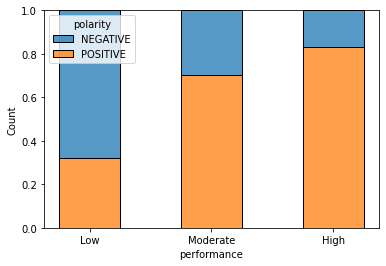

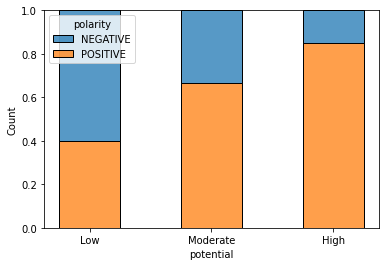

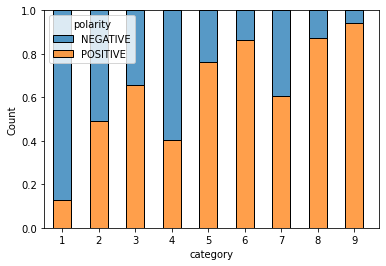

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#stacked bar graph by polarity for perf, potential & category

columns = ('performance','potential','category')

for col in columns:
    #stacked bar chart of polarity but column
    sns.histplot(
        data=df,
        x=col, hue='polarity',
        multiple='fill', stat='count',
        discrete=True, shrink=.5
    )
    
    plt.show()
    


### Examine Word Count by performance, potential category & polarity

category
1    14.261417
2    14.436330
3    14.505285
4    14.533451
5    14.235189
6    14.002141
7    14.681319
8    13.984914
9    13.248288
Name: word_count, dtype: float64


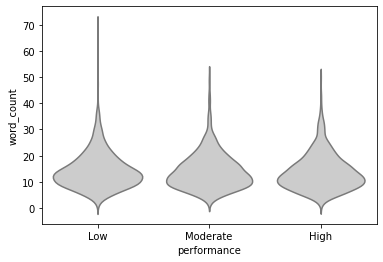

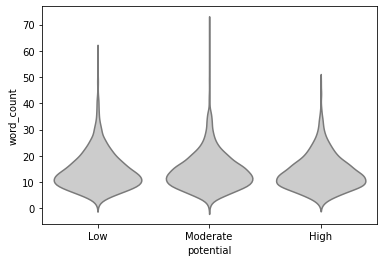

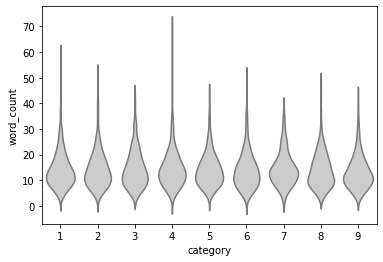

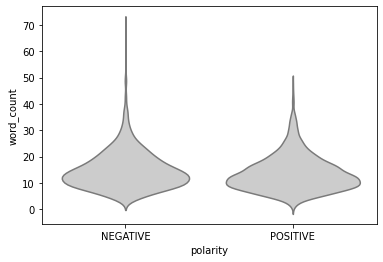

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#word count with median by polarity, performance, potential & category

wc = df.groupby('category')['word_count'].mean()
print(wc)

columns = ('performance','potential','category','polarity')

for col in columns:
    #sns.boxplot(   x=col, y='word_count', data=df, whis=np.inf )   
    sns.violinplot(x=col, y='word_count', data=df, inner=None , color=".8")
    plt.show()
    


### Examine Distribution of Performance Category

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '1: Low : Low'),
  Text(1, 0, '2: Moderate : Low'),
  Text(2, 0, '3: High : Low'),
  Text(3, 0, '4: Low : Moderate'),
  Text(4, 0, '5: Moderate : Moderate'),
  Text(5, 0, '6: High : Moderate'),
  Text(6, 0, '7: Low : High'),
  Text(7, 0, '8: Moderate : High'),
  Text(8, 0, '9: High : High')])

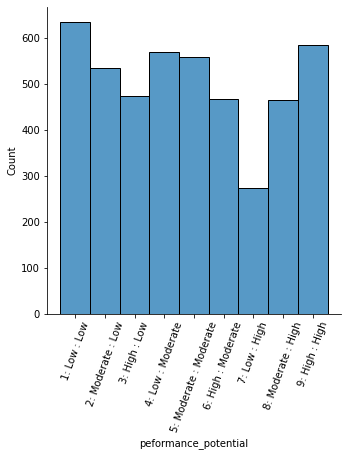

In [13]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data=df, x="peformance_potential", discrete=True)
plt.xticks(rotation=70)


# Sections below will be implemented in final model

### Removing Special Char

In [14]:
import re
re.sub(r'[^\x00-\x7f]',r' ', 'Teamworkâ€™s.')

'Teamwork   s.'

### Expanding Contractions

In [15]:
import contractions
text = '''She's a great team player, though she rarely stands out.'''
 
contractions.fix(text)

'She is a great team player, though she rarely stands out.'